# **Imports**

In [ ]:
# aLL imports below are used to ather data from Reddit
!pip install -q praw
import praw
import pandas as pd
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
!pip install emoji --upgrade
import emoji
import re
import en_core_web_sm
import spacy
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Creates a connection with reddit using created Reddit Api details 
reddit = praw.Reddit(client_id="QGoPOO61ZZ-YIa15DrJF1w",
                     client_secret="q4xv9YQUH1uZ8Hp84g7Sp__NMxahlg",
                     user_agent="super happy flair bot v1.0 by /u/Ytolew")

# **Submission Object for Comments** 

In [ ]:
subreddit = reddit.subreddit("loopringorg")
for submission in subreddit.hot(limit=5):
  print(submission.title) # The submission title 
  print("Submission ID = ", submission.id, "\n") # Submission id

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



LOOPRING DAILY DISCUSSION - December 08, 2021
Submission ID =  rbi3ym 

LOOPRING UNIVERSITY - read if new to Loopring!
Submission ID =  qespta 

Andrew Kang from PleasrDAO on Twitter.
Submission ID =  rbu5wm 

GME EARNINGS IS OUT. READ CAREFULLY
Submission ID =  rc1n5o 

I think this subreddit should, now more then ever, start focusing on why investors should stick around post the announcement.
Submission ID =  rbxgt7 



## **Defining Submission Object**

In [ ]:
Post1 = reddit.submission(id="qqrdmd")

## **Storing Comments Scraped into List**

In [ ]:
Comments_All = [] # Allows us to store scrapped comments into a list
Post1.comments.replace_more(limit=None)
for comments in Post1.comments.list():
  Comments_All.append(comments.body)

print(Comments_All, "\n")
print("Total Comments Scraped = ", (len(Comments_All)))

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

['All crypto assets in LRC, all stock-assets in GME. Live, laugh and love my dudes. We finna have a good life.', "Almost at a 1000 coins, wish I put in more at 1.50 but that's how the story goes.", 'GME end game is the NFT launch.\n\nLRC beginning is the NFT launch.', 'I sold ducking good stocks and even liquified LEAPs that were sure to moon down the road to get in on LRC.  All shares are in GME and all crypto in LRC.  That’s diversification, right?', 'Bought at .38, .44, 1.12, 1.88 & 2.80. Just woke up  and looks like if I can find some $$ I will be buying at over 3$ today. Love my ass some LRC! LFG!', "I was in crypto before GME but I've been in GME since January and picked up $LRC and made it my main holding because of the GS rumours 🚀\n\nAnd because its solid sounding tech that solves actual problems.", 'Exclusively in GME and LRC.', 'GME ape here, I’ve just been buying last 10 months. Now I will be buying LRC every month too. I don’t know what else to do', "As I get older I find 

#

In [ ]:
List1 = Comments_All
List1 = [str(i) for i in List1]
string_uncleaned = " ,".join(List1) # Joins all strings that are separate by comma
string_uncleaned

'All crypto assets in LRC, all stock-assets in GME. Live, laugh and love my dudes. We finna have a good life. ,Almost at a 1000 coins, wish I put in more at 1.50 but that\'s how the story goes. ,GME end game is the NFT launch.\n\nLRC beginning is the NFT launch. ,I sold ducking good stocks and even liquified LEAPs that were sure to moon down the road to get in on LRC.  All shares are in GME and all crypto in LRC.  That’s diversification, right? ,Bought at .38, .44, 1.12, 1.88 & 2.80. Just woke up  and looks like if I can find some $$ I will be buying at over 3$ today. Love my ass some LRC! LFG! ,I was in crypto before GME but I\'ve been in GME since January and picked up $LRC and made it my main holding because of the GS rumours 🚀\n\nAnd because its solid sounding tech that solves actual problems. ,Exclusively in GME and LRC. ,GME ape here, I’ve just been buying last 10 months. Now I will be buying LRC every month too. I don’t know what else to do ,As I get older I find myself fascinat

In [ ]:
string_emojiless = emoji.get_emoji_regexp().sub(u"",string_uncleaned)

In [ ]:
# Tokenizer which breaks apart each word into indivualized tokens to allows us to anayle sentiment late. 
tokenizer = RegexpTokenizer("\w+|\$[\d\d.]+|http\S+")
tokenized_string = tokenizer.tokenize(string_emojiless)
print(tokenized_string)

['All', 'crypto', 'assets', 'in', 'LRC', 'all', 'stock', 'assets', 'in', 'GME', 'Live', 'laugh', 'and', 'love', 'my', 'dudes', 'We', 'finna', 'have', 'a', 'good', 'life', 'Almost', 'at', 'a', '1000', 'coins', 'wish', 'I', 'put', 'in', 'more', 'at', '1', '50', 'but', 'that', 's', 'how', 'the', 'story', 'goes', 'GME', 'end', 'game', 'is', 'the', 'NFT', 'launch', 'LRC', 'beginning', 'is', 'the', 'NFT', 'launch', 'I', 'sold', 'ducking', 'good', 'stocks', 'and', 'even', 'liquified', 'LEAPs', 'that', 'were', 'sure', 'to', 'moon', 'down', 'the', 'road', 'to', 'get', 'in', 'on', 'LRC', 'All', 'shares', 'are', 'in', 'GME', 'and', 'all', 'crypto', 'in', 'LRC', 'That', 's', 'diversification', 'right', 'Bought', 'at', '38', '44', '1', '12', '1', '88', '2', '80', 'Just', 'woke', 'up', 'and', 'looks', 'like', 'if', 'I', 'can', 'find', 'some', 'I', 'will', 'be', 'buying', 'at', 'over', '3', 'today', 'Love', 'my', 'ass', 'some', 'LRC', 'LFG', 'I', 'was', 'in', 'crypto', 'before', 'GME', 'but', 'I', 'v

In [ ]:
lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

['all', 'crypto', 'assets', 'in', 'lrc', 'all', 'stock', 'assets', 'in', 'gme', 'live', 'laugh', 'and', 'love', 'my', 'dudes', 'we', 'finna', 'have', 'a', 'good', 'life', 'almost', 'at', 'a', '1000', 'coins', 'wish', 'i', 'put', 'in', 'more', 'at', '1', '50', 'but', 'that', 's', 'how', 'the', 'story', 'goes', 'gme', 'end', 'game', 'is', 'the', 'nft', 'launch', 'lrc', 'beginning', 'is', 'the', 'nft', 'launch', 'i', 'sold', 'ducking', 'good', 'stocks', 'and', 'even', 'liquified', 'leaps', 'that', 'were', 'sure', 'to', 'moon', 'down', 'the', 'road', 'to', 'get', 'in', 'on', 'lrc', 'all', 'shares', 'are', 'in', 'gme', 'and', 'all', 'crypto', 'in', 'lrc', 'that', 's', 'diversification', 'right', 'bought', 'at', '38', '44', '1', '12', '1', '88', '2', '80', 'just', 'woke', 'up', 'and', 'looks', 'like', 'if', 'i', 'can', 'find', 'some', 'i', 'will', 'be', 'buying', 'at', 'over', '3', 'today', 'love', 'my', 'ass', 'some', 'lrc', 'lfg', 'i', 'was', 'in', 'crypto', 'before', 'gme', 'but', 'i', 'v

In [ ]:
nlp = en_core_web_sm.load()
all_stopwords = nlp.Defaults.stop_words

text = lower_string_tokenized
tokens_without_sw = [word for word in text if not word in all_stopwords]

print(tokens_without_sw)

['crypto', 'assets', 'lrc', 'stock', 'assets', 'gme', 'live', 'laugh', 'love', 'dudes', 'finna', 'good', 'life', '1000', 'coins', 'wish', '1', '50', 's', 'story', 'goes', 'gme', 'end', 'game', 'nft', 'launch', 'lrc', 'beginning', 'nft', 'launch', 'sold', 'ducking', 'good', 'stocks', 'liquified', 'leaps', 'sure', 'moon', 'road', 'lrc', 'shares', 'gme', 'crypto', 'lrc', 's', 'diversification', 'right', 'bought', '38', '44', '1', '12', '1', '88', '2', '80', 'woke', 'looks', 'like', 'find', 'buying', '3', 'today', 'love', 'ass', 'lrc', 'lfg', 'crypto', 'gme', 've', 'gme', 'january', 'picked', 'lrc', 'main', 'holding', 'gs', 'rumours', 'solid', 'sounding', 'tech', 'solves', 'actual', 'problems', 'exclusively', 'gme', 'lrc', 'gme', 'ape', 've', 'buying', '10', 'months', 'buying', 'lrc', 'month', 'don', 't', 'know', 'older', 'find', 'fascinated', 'turns', 'life', 'takes', 'laid', 'year', 'ago', 'today', 'job', 'dreamed', 'january', 'bought', '100', 'shares', 'gamestop', 'trying', 'quick', 'bu

In [ ]:
# Normalizing each tokens using lemmatizing to shorten words to the root
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

['crypto', 'asset', 'lrc', 'stock', 'asset', 'gme', 'live', 'laugh', 'love', 'dude', 'finna', 'good', 'life', '1000', 'coin', 'wish', '1', '50', 's', 'story', 'go', 'gme', 'end', 'game', 'nft', 'launch', 'lrc', 'beginning', 'nft', 'launch', 'sold', 'ducking', 'good', 'stock', 'liquified', 'leap', 'sure', 'moon', 'road', 'lrc', 'share', 'gme', 'crypto', 'lrc', 's', 'diversification', 'right', 'bought', '38', '44', '1', '12', '1', '88', '2', '80', 'woke', 'look', 'like', 'find', 'buying', '3', 'today', 'love', 'as', 'lrc', 'lfg', 'crypto', 'gme', 've', 'gme', 'january', 'picked', 'lrc', 'main', 'holding', 'g', 'rumour', 'solid', 'sounding', 'tech', 'solves', 'actual', 'problem', 'exclusively', 'gme', 'lrc', 'gme', 'ape', 've', 'buying', '10', 'month', 'buying', 'lrc', 'month', 'don', 't', 'know', 'older', 'find', 'fascinated', 'turn', 'life', 'take', 'laid', 'year', 'ago', 'today', 'job', 'dreamed', 'january', 'bought', '100', 'share', 'gamestop', 'trying', 'quick', 'buck', 'today', 'm',

In [ ]:
stemmer = PorterStemmer()

stem_tokens = ([stemmer.stem(s) for s in tokens_without_sw])
print(stem_tokens)

['crypto', 'asset', 'lrc', 'stock', 'asset', 'gme', 'live', 'laugh', 'love', 'dude', 'finna', 'good', 'life', '1000', 'coin', 'wish', '1', '50', 's', 'stori', 'goe', 'gme', 'end', 'game', 'nft', 'launch', 'lrc', 'begin', 'nft', 'launch', 'sold', 'duck', 'good', 'stock', 'liquifi', 'leap', 'sure', 'moon', 'road', 'lrc', 'share', 'gme', 'crypto', 'lrc', 's', 'diversif', 'right', 'bought', '38', '44', '1', '12', '1', '88', '2', '80', 'woke', 'look', 'like', 'find', 'buy', '3', 'today', 'love', 'ass', 'lrc', 'lfg', 'crypto', 'gme', 've', 'gme', 'januari', 'pick', 'lrc', 'main', 'hold', 'gs', 'rumour', 'solid', 'sound', 'tech', 'solv', 'actual', 'problem', 'exclus', 'gme', 'lrc', 'gme', 'ape', 've', 'buy', '10', 'month', 'buy', 'lrc', 'month', 'don', 't', 'know', 'older', 'find', 'fascin', 'turn', 'life', 'take', 'laid', 'year', 'ago', 'today', 'job', 'dream', 'januari', 'bought', '100', 'share', 'gamestop', 'tri', 'quick', 'buck', 'today', 'm', 'earli', 'learn', 'defi', 'have', 'purchas', 

In [ ]:
cleaned_output = lemmatized_tokens

In [ ]:
print("Original length of words = ", (len(string_uncleaned)))
print("Number of words after removing emojis = ", (len(string_emojiless)))
print("Number of words after removing tokenizing and cleaning = ", (len(tokenized_string)))
print("Number of words after removing tokenizing, cleaning and removing stop words = ", (len(tokens_without_sw)))
print("Number of words after removing tokenizing, cleaning, removing stop words and lemmatized = ", (len(lemmatized_tokens)))
print("Number of words for final output = ", (len(cleaned_output)))

Original length of words =  113167
Number of words after removing emojis =  112707
Number of words after removing tokenizing and cleaning =  21528
Number of words after removing tokenizing, cleaning and removing stop words =  10544
Number of words after removing tokenizing, cleaning, removing stop words and lemmatized =  10544
Number of words for final output =  10544


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

sia = SIA()
results = []

for sentences in cleaned_output:
  pol_score = sia.polarity_scores(sentences)
  pol_score["words"] = sentences
  results.append(pol_score)

pd.set_option("display.max_columns", None, "max_colwidth", None)
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.0000,crypto
1,0.0,0.0,1.0,0.3612,asset
2,0.0,1.0,0.0,0.0000,lrc
3,0.0,1.0,0.0,0.0000,stock
4,0.0,0.0,1.0,0.3612,asset
...,...,...,...,...,...
10539,0.0,1.0,0.0,0.0000,know
10540,0.0,1.0,0.0,0.0000,buy
10541,0.0,1.0,0.0,0.0000,hold
10542,0.0,1.0,0.0,0.0000,buy


In [ ]:
df["label"] = 0

df.loc[df["compound"] > 0.10, "label"] = 1
df.loc[df["compound"] < -0.10, "label"] = -1
df.head()

,neg,neu,pos,compound,words,label
0,0.0,1.0,0.0,0.0000,crypto,0
1,0.0,0.0,1.0,0.3612,asset,1
2,0.0,1.0,0.0,0.0000,lrc,0
3,0.0,1.0,0.0,0.0000,stock,0
4,0.0,0.0,1.0,0.3612,asset,1


In [ ]:
print(df.label.value_counts())

 0    9408
 1     873
-1     263
Name: label, dtype: int64


<function matplotlib.pyplot.show>

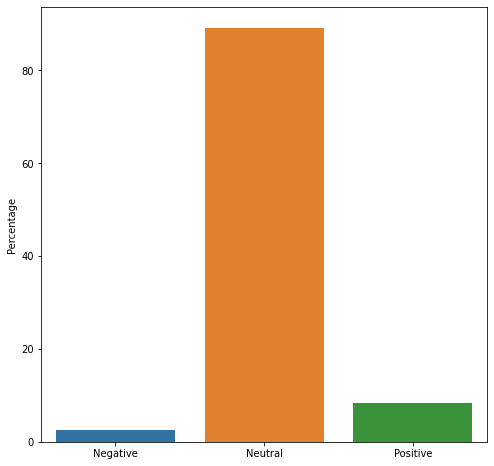

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(["Negative", "Neutral", "Positive"])
ax.set_ylabel("Percentage")

plt.show

In [ ]:
df_positive_negative = df.loc[df["label"] != 0]
df_positive_negative.head()

,neg,neu,pos,compound,words,label
1,0.0,0.0,1.0,0.3612,asset,1
4,0.0,0.0,1.0,0.3612,asset,1
7,0.0,0.0,1.0,0.5574,laugh,1
8,0.0,0.0,1.0,0.6369,love,1
11,0.0,0.0,1.0,0.4404,good,1


In [ ]:
print(df_positive_negative.label.value_counts())

 1    873
-1    263
Name: label, dtype: int64


<function matplotlib.pyplot.show>

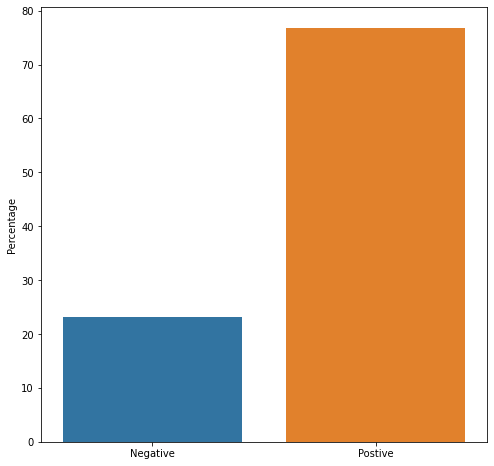

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

counts = df_positive_negative.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax = ax)

ax.set_xticklabels(["Negative", "Postive"])
ax.set_ylabel("Percentage")

plt.show

In [ ]:
positive_words = list(df.loc[df["label"] == 1].words)
print(postive_words)

['like', 'increase', 'like', 'resolved', 'easing', 'profit', 'like', 'thanks', 'wow', 'like', 'thanks', 'cool', 'cool', 'welcome', 'good', 'won', 'lmao', 'perfect', 'admitted', 'worth', 'gain', 'apologize', 'exciting', 'impressed', 'fun', 'care', 'kind', 'truth', 'like', 'wow', 'lol', 'cool', 'like', 'wow', 'won', 'share', 'honestly', 'share', 'play', 'favorite', 'love', 'calm', 'like', 'honestly', 'attracted', 'gain', 'funny', 'ready', 'yeah', 'good', 'good', 'care', 'play', 'god', 'create', 'god', 'sure', 'lol', 'best', 'good', 'chance', 'clearly', 'share', 'like', 'lol', 'lol', 'profit', 'stronger', 'thanks', 'wealthy', 'love', 'growth', 'sharing', 'increase', 'share', 'share', 'rich', 'ok', 'free', 'like', 'lol', 'clearly', 'like', 'value', 'play', 'lmfao', 'worth', 'huge', 'interesting', 'wow', 'lovely', 'like', 'celebrating', 'lol', 'join', 'congrats', 'lol', 'win', 'lol', 'friend', 'diamond', 'hand', 'share', 'reached', 'happy', 'god', 'straight', 'lmao', 'easy', 'merry', 'good'

In [ ]:
positive_frequency = FreqDist(positive_words)
pos_freq = positive_frequency.most_common(50)
pos_freq

[('like', 73),
 ('share', 47),
 ('hand', 38),
 ('diamond', 37),
 ('good', 30),
 ('best', 23),
 ('gain', 16),
 ('worth', 15),
 ('happy', 14),
 ('love', 13),
 ('help', 13),
 ('hope', 13),
 ('play', 12),
 ('lol', 12),
 ('free', 12),
 ('nice', 12),
 ('strong', 12),
 ('wish', 11),
 ('pretty', 11),
 ('friend', 11),
 ('sure', 10),
 ('hoping', 10),
 ('true', 9),
 ('thanks', 9),
 ('yolo', 9),
 ('asset', 8),
 ('fun', 8),
 ('ready', 8),
 ('great', 8),
 ('profit', 8),
 ('thank', 8),
 ('better', 7),
 ('value', 7),
 ('yeah', 7),
 ('yes', 7),
 ('definitely', 7),
 ('solid', 6),
 ('haha', 6),
 ('welcome', 6),
 ('competitive', 6),
 ('yep', 5),
 ('huge', 5),
 ('kind', 5),
 ('glad', 5),
 ('enjoy', 5),
 ('cool', 4),
 ('won', 4),
 ('super', 4),
 ('smart', 4),
 ('excited', 4)]

In [ ]:
negative_words = list(df.loc[df["label"] == -1].words)
print(negative_words)

['problem', 'pay', 'stuck', 'trauma', 'suspicious', 'trauma', 'dumbest', 'shit', 'pay', 'debt', 'debt', 'desperately', 'crisis', 'regretting', 'debt', 'ignore', 'shame', 'forget', 'bad', 'bad', 'hard', 'hard', 'dump', 'obnoxious', 'worry', 'idiot', 'bitch', 'retard', 'pay', 'gun', 'demand', 'abusive', 'fuck', 'dumb', 'retard', 'crash', '86', 'lost', 'forgotten', 'clueless', 'broke', 'leak', 'negative', 'paranoid', 'disagrees', 'fuck', 'drop', 'suspect', 'shit', 'regret', 'demand', 'bullshit', 'dumb', 'depressed', 'crazy', 'bad', 'dump', 'bad', 'bitter', 'hard', 'fuck', 'stupidly', 'stop', 'scare', 'crazy', 'drag', 'hated', 'lack', 'distracting', 'crazy', 'hesitantly', 'dump', 'fuck', 'low', 'die', 'bullshit', 'tired', 'stupid', 'stupid', 'shit', 'dump', 'manipulated', 'fuck', 'zealot', 'die', 'bitch', 'wrong', 'miss', 'fuck', 'bad', 'leak', 'mad', 'hell', 'wrong', 'die', 'doubt', 'leak', 'manipulated', 'crazy', 'low', 'drop', 'hard', 'fucker', 'pay', 'disappointed', 'stop', 'crazy', 's

In [ ]:
negative_frequency = FreqDist(negative_words)
neg_freq = negative_frequency.most_common(50)
neg_freq

[('fuck', 14),
 ('shit', 13),
 ('hard', 10),
 ('pay', 8),
 ('crazy', 7),
 ('bad', 6),
 ('drop', 5),
 ('stop', 5),
 ('low', 5),
 ('stupid', 5),
 ('wrong', 5),
 ('missed', 5),
 ('dump', 4),
 ('leak', 4),
 ('regret', 4),
 ('debt', 3),
 ('forget', 3),
 ('retard', 3),
 ('gun', 3),
 ('dumb', 3),
 ('broke', 3),
 ('suspect', 3),
 ('die', 3),
 ('miss', 3),
 ('hell', 3),
 ('sad', 3),
 ('weird', 3),
 ('damn', 3),
 ('problem', 2),
 ('trauma', 2),
 ('ignore', 2),
 ('worry', 2),
 ('bitch', 2),
 ('demand', 2),
 ('crash', 2),
 ('lost', 2),
 ('bullshit', 2),
 ('scare', 2),
 ('manipulated', 2),
 ('mad', 2),
 ('cancer', 2),
 ('hate', 2),
 ('shake', 2),
 ('lose', 2),
 ('worried', 2),
 ('dumped', 2),
 ('cry', 2),
 ('risk', 2),
 ('fail', 2),
 ('stuck', 1)]

In [ ]:
Pos_words = [str(p) for p in pos_freq]
Pos_words_string = " , ".join(Pos_words)

In [ ]:
Neg_words = [str(p) for p in neg_freq]
Neg_words_string = " , ".join(Neg_words)

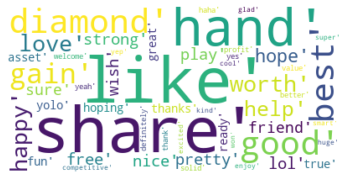

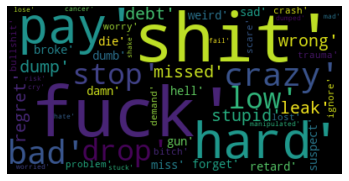

In [ ]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

wordcloud_positve = WordCloud(background_color="white").generate(Pos_words_string)
wordcloud_negative = WordCloud(background_color="black").generate(Neg_words_string)

plt.imshow(wordcloud_positve, interpolation="bilinear")
plt.axis("off")
plt.show()


plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import plotly.express as px

pos_freq_df = pd.DataFrame(pos_freq)
pos_freq_df = pos_freq_df.rename(columns = {0: "Bar graph of Frequent words", 1: "Count"}, inplace = False)

fig = px.bar(pos_freq_df, x= "Bar graph of Frequent words" , y="Count", title = "Commonly Used Positive Words by Count")
fig.show()

In [ ]:
neg_freq_df = pd.DataFrame(neg_freq)
neg_freq_df = neg_freq_df.rename(columns = {0: "Bar graph of Frequent words", 1: "Count"}, inplace = False)

fig = px.bar(neg_freq_df, x= "Bar graph of Frequent words" , y="Count", title = "Commonly Used Negative Words by Count")
fig.show()